<a href="https://colab.research.google.com/github/dead96pool/stress_detection_mlai/blob/main/MLAI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import glob
import os

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score

from tensorflow.keras.models import Sequential
#from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.optimizers import SGD, RMSprop

from tensorflow.keras.callbacks import EarlyStopping


# To gbm light
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest, chi2



# Creating Dataset

In [ ]:
# git repo clone
!git clone https://github.com/dead96pool/datasets
# removing the clone
#!rm -rf datasets

Cloning into 'datasets'...
remote: Enumerating objects: 2817, done.
remote: Counting objects: 100% (1402/1402), done.
remote: Compressing objects: 100% (1388/1388), done.
remote: Total 2817 (delta 10), reused 1401 (delta 9), pack-reused 1415
Receiving objects: 100% (2817/2817), 65.32 MiB | 12.62 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Updating files: 100% (1360/1360), done.
Filtering content: 100% (1357/1357), 853.65 MiB | 23.67 MiB/s, done.


In [ ]:
calm_path = "/content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/CALM/"
stress_path = "/content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/STRESS/"

In [ ]:
column_names = [
    'participant_id', 'age', 'gender', 'key_press_count', 'delete_key_press_count',
    'text_id', 'text_length', 'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
    'accelerometer_magnitude', 'gravity_x', 'gravity_y', 'gravity_z', 'gravity_magnitude',
    'linear_acceleration_x', 'linear_acceleration_y', 'linear_acceleration_z',
    'linear_acceleration_magnitude',
    'gyroscope_x', 'gyroscope_y', 'gyroscope_z', 'gyroscope_magnitude',
    'magnetometer_x', 'magnetometer_y', 'magnetometer_z', 'magnetometer_magnitude',
    'light_sensor', 'proximity_sensor',
    'game_rotation_vector_x', 'game_rotation_vector_y', 'game_rotation_vector_z',
    'game_rotation_vector_magnitude',
    'rotation_sensor_x', 'rotation_sensor_y', 'rotation_sensor_z', 'rotation_sensor_scalar',
    'rotation_sensor_value',
    'rotation_sensor_magnitude',
    'orientation_azimuth', 'orientation_pitch', 'orientation_roll', 'orientation_sensor_magnitude',
    'number_of_steps'
]


In [ ]:
# looping throught the calm folder to combine all the CALM files
# CALM/STRESS_{participant ID}_{text ID}.csv
"""calm_pattern = calm_path + "CALM_*_*.csv"
calm_files = glob.glob(calm_pattern)

calm_df = pd.DataFrame()

for file in calm_files:
    df = pd.read_csv(file, sep=';')
    calm_df=pd.concat([calm_df,df],axis=0)
"""

In [ ]:
calm_df = pd.DataFrame()

for i in range(1,111):
    for j in range(1, 8):
        file_path = calm_path + f"CALM_{i}_{j}.csv"
        try:
            if os.path.exists(file_path):
                df = pd.read_csv(file_path, sep=";",header=None)
                calm_df = pd.concat([calm_df, df], axis=0)
            else:
                print(f"File {file_path} does not exist.")
        except FileNotFoundError:
            print(f"File {file_path} not found.")


File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/CALM/CALM_1_6.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/CALM/CALM_1_7.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/CALM/CALM_2_6.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/CALM/CALM_2_7.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/CALM/CALM_3_6.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/CALM/CALM_3_7.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/CALM/CALM_4_6.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/CALM/CALM_4_7.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress

In [ ]:
display(calm_df)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1,30,Male,1,0,1,27,-1.398295,4.552336,8.461134,...,0.174533,1.015117,33.908630,-28.277462,-9.235774,45.107754,14.0,NaN,NaN,NaN
1,1,30,Male,1,0,1,27,-1.593871,4.467315,8.753821,...,0.174533,1.015117,33.908630,-28.277462,-9.235774,45.107754,14.0,NaN,NaN,NaN
2,1,30,Male,1,0,1,27,-1.593871,4.467315,8.753821,...,0.174533,1.015117,34.351746,-27.661564,-9.056985,45.024810,14.0,NaN,NaN,NaN
3,1,30,Male,2,0,1,27,-1.669115,4.492037,8.941505,...,0.174533,1.015117,34.698883,-27.327988,-8.964363,45.068737,14.0,NaN,NaN,NaN
4,1,30,Male,2,0,1,27,-1.669115,4.492037,8.941505,...,0.174533,1.015117,34.698883,-27.327988,-8.964363,45.068737,14.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,110,21,Male,92,11,7,71,0.292102,6.706364,7.491686,...,0.000000,0.999999,253.035060,-43.073948,1.715667,256.680850,0.0,0.0,yarıyıl tatilinin ardından eğitim öğretim yılı...,yarıyıl tatilinin ardından eğitim öğretim yılı...
1176,110,21,Male,92,11,7,71,0.071828,6.775798,7.360001,...,0.000000,0.999999,252.861080,-43.928130,1.467874,256.652620,0.0,0.0,yarıyıl tatilinin ardından eğitim öğretim yılı...,yarıyıl tatilinin ardından eğitim öğretim yılı...
1177,110,21,Male,92,11,7,71,0.071828,6.775798,7.360001,...,0.000000,0.999999,252.861080,-43.928130,1.467874,256.652620,0.0,0.0,yarıyıl tatilinin ardından eğitim öğretim yılı...,yarıyıl tatilinin ardından eğitim öğretim yılı...
1178,110,21,Male,92,11,7,71,0.172388,7.101419,6.143709,...,0.000000,0.999999,252.706180,-44.326942,0.968044,256.566220,0.0,0.0,yarıyıl tatilinin ardından eğitim öğretim yılı...,yarıyıl tatilinin ardından eğitim öğretim yılı...


In [ ]:
calm_df1 = calm_df.iloc[:,7:].dropna(axis = 1)

In [ ]:
# looping throught the calm folder to combine all the STRESS files
"""stress_pattern = stress_path + "STRESS_*_2.csv"
stress_files = glob.glob(stress_pattern)

stress_df = []

for file in calm_files:
    df = pd.read_csv(file, sep=';', names=column_names, usecols=range(44))
    stress_df.append(df)
"""

In [ ]:
stress_df = pd.DataFrame()

for i in range(1,111):
    for j in range(1, 8):
        file_path = stress_path + f"STRESS_{i}_{j}.csv"
        try:
            if os.path.exists(file_path):
                df = pd.read_csv(file_path, sep=";",header=None)
                stress_df = pd.concat([stress_df, df], axis=0)
            else:
                print(f"File {file_path} does not exist.")
        except FileNotFoundError:
            print(f"File {file_path} not found.")


File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/STRESS/STRESS_1_6.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/STRESS/STRESS_1_7.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/STRESS/STRESS_2_6.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/STRESS/STRESS_2_7.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/STRESS/STRESS_3_6.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/STRESS/STRESS_3_7.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/STRESS/STRESS_4_6.csv does not exist.
File /content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/STRESS/STRESS_4_7.csv does not exist.
File /content/datasets/machine_l

In [ ]:
stress_df1 = stress_df.iloc[:,7:].dropna(axis = 1)

In [ ]:
stress_df1['target']='S'
calm_df1['target']='C'
df = pd.concat([stress_df1, calm_df1], axis=0)


In [ ]:
df

,7,8,9,10,11,12,13,14,15,16,...,35,36,37,38,39,40,41,42,43,target
0,-0.505169,4.584610,8.654279,9.806650,-0.505169,4.584610,8.654279,9.806650,0.000000,0.000000,...,-0.291391,0.918954,0.174533,1.015117,33.315735,-30.103119,-6.949028,45.435944,14.0,S
1,-0.505169,4.584610,8.654279,9.806650,-0.505169,4.584610,8.654279,9.806650,0.000000,0.000000,...,-0.291391,0.918954,0.174533,1.015117,33.315735,-30.103119,-6.949028,45.435944,14.0,S
2,-0.505169,4.584610,8.654279,9.806650,-0.505169,4.584610,8.654279,9.806650,0.000000,0.000000,...,-0.291391,0.918954,0.174533,1.015117,36.269745,-27.845741,-2.123154,45.775402,14.0,S
3,-0.315210,4.459319,8.487139,9.592518,-0.363312,4.577469,8.665169,9.806649,0.048103,-0.118151,...,-0.306295,0.920860,0.174533,1.015117,36.269745,-27.845741,-2.123154,45.775402,14.0,S
4,-0.315210,4.459319,8.487139,9.592518,-0.363312,4.577469,8.665169,9.806649,0.048103,-0.118151,...,-0.306295,0.920860,0.174533,1.015117,36.269745,-27.845741,-2.123154,45.775402,14.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0.292102,6.706364,7.491686,10.059125,0.214472,6.697370,7.160274,9.806644,0.077630,0.008994,...,0.745513,0.556130,0.000000,0.999999,253.035060,-43.073948,1.715667,256.680850,0.0,C
1176,0.071828,6.775798,7.360001,10.004309,0.180925,6.803418,7.060531,9.806646,-0.109097,-0.027620,...,0.744446,0.552979,0.000000,0.999999,252.861080,-43.928130,1.467874,256.652620,0.0,C
1177,0.071828,6.775798,7.360001,10.004309,0.180925,6.803418,7.060531,9.806646,-0.109097,-0.027620,...,0.744446,0.552979,0.000000,0.999999,252.861080,-43.928130,1.467874,256.652620,0.0,C
1178,0.172388,7.101419,6.143709,9.391753,0.118522,6.852414,7.014319,9.806645,0.053866,0.249005,...,0.744744,0.550441,0.000000,0.999999,252.706180,-44.326942,0.968044,256.566220,0.0,C


In [ ]:
df.to_csv('combined_dataset.csv', index=False)

In [ ]:
# Random Forest

X = df.drop('target', axis = 1)
y = df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=50)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = (predictions == y_test).mean()
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report)

KeyboardInterrupt: 

In [ ]:
# combining all the calm files
#calm_combine_df = pd.concat(calm_df, axis=0, ignore_index= True)

In [ ]:
#print(calm_combine_df.info())

In [ ]:
# combining all the stress files
stress_combine_df = pd.concat(stress_df, axis=0, ignore_index= True)

In [ ]:
print(stress_combine_df.shape)
print(calm_combine_df.shape)

(866, 4400)
(866, 4400)


In [ ]:
# combining rows to reduce the rows
# combining 100 rows so 5 secs worth data in a single row

row_count = 100  # Change this value to control how many rows to stack horizontally

# Calculate the number of rows to add
num_rows_to_add = row_count - (len(calm_combine_df) % row_count)

# Generate NaN values for the new rows
new_rows_data = pd.DataFrame({col: [np.nan] * num_rows_to_add for col in calm_combine_df.columns})

# Append the new rows to the DataFrame
# this is to make the rows in the dataframe a multiple of the row_count
calm_combine_df = pd.concat([calm_combine_df, new_rows_data], ignore_index=True)

n = len(calm_combine_df)
# Calculate the number of resulting columns
num_columns = calm_combine_df.shape[1] * row_count

# Reshape the DataFrame into desired shape
reshaped_values = np.reshape(calm_combine_df.values, (-1, row_count, calm_combine_df.shape[1]))
column_names = [f'{col}_{i}' for i in range(row_count) for col in calm_combine_df.columns]
calm_combine_df = pd.DataFrame(reshaped_values.reshape(-1, num_columns), columns=column_names)


In [ ]:
# combining rows to reduce the rows
# combining 100 rows so 5 secs worth data in a single row

#row_count = 5  # Change this value to control how many rows to stack horizontally

# Calculate the number of rows to add
num_rows_to_add = row_count - (len(stress_combine_df) % row_count)

# Generate NaN values for the new rows
new_rows_data = pd.DataFrame({col: [np.nan] * num_rows_to_add for col in stress_combine_df.columns})

# Append the new rows to the DataFrame
stress_combine_df = pd.concat([stress_combine_df, new_rows_data], ignore_index=True)

n = len(stress_combine_df)
# Calculate the number of resulting columns
num_columns = stress_combine_df.shape[1] * row_count

# Reshape the DataFrame into desired shape
reshaped_values = np.reshape(stress_combine_df.values, (-1, row_count, stress_combine_df.shape[1]))
column_names = [f'{col}_{i}' for i in range(row_count) for col in stress_combine_df.columns]
stress_combine_df = pd.DataFrame(reshaped_values.reshape(-1, num_columns), columns=column_names)


In [ ]:
# 0 is calm
# 1 is stressed
calm_combine_df["stress"] = 0
stress_combine_df["stress"] = 1

In [ ]:
# calm dataset
#display(calm_combine_df.sort_values(by='participant_id'))
# combining the stress and the calm dataframes together
# ignoring the index and creating a new indexing
combined_df = pd.concat([calm_combine_df, stress_combine_df], ignore_index = True, axis = 0)

In [ ]:
# stress dataset
display(combined_df)

,participant_id_0,age_0,gender_0,key_press_count_0,delete_key_press_count_0,text_id_0,text_length_0,accelerometer_x_0,accelerometer_y_0,accelerometer_z_0,...,rotation_sensor_z_99,rotation_sensor_scalar_99,rotation_sensor_value_99,rotation_sensor_magnitude_99,orientation_azimuth_99,orientation_pitch_99,orientation_roll_99,orientation_sensor_magnitude_99,number_of_steps_99,stress
0,48.0,19.0,Male,1.0,0.0,2.0,47.0,-0.1632,2.1094,9.5301,...,0.873417,0.478776,0.0,0.999999,237.51999,-9.42,3.83,237.73756,19447.0,0
1,48.0,19.0,Male,9.0,3.0,2.0,47.0,0.5255,1.7001,9.0246,...,0.877669,0.46584,0.0,0.999999,236.18,-12.49,2.99,236.52892,19447.0,0
2,48.0,19.0,Male,16.0,5.0,2.0,47.0,0.9013,2.2281,9.7232,...,0.880441,0.460004,0.0,0.999999,235.54999,-12.84,3.01,235.91888,19447.0,0
3,48.0,19.0,Male,22.0,5.0,2.0,47.0,0.396,2.1716,9.5331,...,0.878422,0.465471,0.0,1.0,235.98999,-12.28,2.13,236.31888,19447.0,0
4,48.0,19.0,Male,30.0,5.0,2.0,47.0,0.3489,2.0231,9.649099,...,0.881136,0.455288,0.0,1.0,235.0,-14.219999,3.54,235.45645,19447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,11.0,27.0,Male,32.0,7.0,2.0,47.0,-0.560863,6.503941,7.590386,...,-0.631197,0.689923,0.174533,1.015117,83.869446,-41.43827,-2.749245,93.58831,14.0,1
1728,11.0,27.0,Male,35.0,7.0,2.0,47.0,-0.673974,6.527199,6.71911,...,-0.606224,0.713886,0.174533,1.015117,79.09204,-40.855633,-4.248488,89.12229,14.0,1
1729,11.0,27.0,Male,38.0,8.0,2.0,47.0,-0.724099,6.455757,7.598742,...,-0.614443,0.698454,0.174533,1.015117,81.22803,-42.92289,-3.685596,91.94537,14.0,1
1730,11.0,27.0,Male,44.0,8.0,2.0,47.0,-0.586304,6.679419,7.383354,...,-0.599613,0.714317,0.174533,1.015117,78.11395,-42.068184,-4.958333,88.86004,14.0,1


In [ ]:
#for column in combined_df.columns:
    # Attempt to convert the column to numeric, coercing errors to NaN
#    numeric_column = pd.to_numeric(combined_df[column], errors='coerce')

    # Check if all values are numeric
#    if numeric_column.notnull().all():
#        print(f"{column} contains only numeric data.")
#    else:
#        print(f"{column} contains non-numeric data.")

In [ ]:
print("Null value count:", combined_df.isnull().sum().sum(), "\n\n")
print(combined_df.info())

Null value count: 4840 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Columns: 4401 entries, participant_id_0 to stress
dtypes: int64(1), object(4400)
memory usage: 58.2+ MB
None


In [ ]:
#remove null values
combined_df.dropna(inplace=True)
print("Null value count:", combined_df.isnull().sum().sum(), "\n\n")
print(combined_df.info())

Null value count: 0 


<class 'pandas.core.frame.DataFrame'>
Index: 1730 entries, 0 to 1730
Columns: 4401 entries, participant_id_0 to stress
dtypes: int64(1), object(4400)
memory usage: 58.1+ MB
None


In [ ]:
# Define the range of column numbers you want to include in the info
#start_column = 0  # starting column number
#end_column = 44    # ending column number (exclusive)

# Select the columns within the defined range
#selected_columns = combined_df.iloc[:, start_column:end_column]

# Print the information of the selected columns
#print(selected_columns.info())

In [ ]:
# finding unique participant values
#print(sorted(calm_combine_df["participant_id"].unique()))
#print(len(calm_combine_df["participant_id"].unique()))

#print(sorted(stress_combine_df["participant_id"].unique()))
#print(len(stress_combine_df["participant_id"].unique()))

#print(sorted(calm_combine_df["stress"].unique()))
#print(len(calm_combine_df["stress"].unique()))

#print(sorted(stress_combine_df["stress"].unique()))
#print(len(stress_combine_df["stress"].unique()))

In [ ]:
#print(stress_combine_df.isnull().sum().sum())
#print(stress_combine_df.info())

In [ ]:
#display(combined_df.sort_values(by="participant_id"))

In [ ]:
# Encode the 'gender' column using LabelEncoder
enc = LabelEncoder()

# Assuming `combined_df` is your DataFrame containing columns from gender_0 to gender_99
for i in range(100):  # Assuming you have 100 columns from gender_0 to gender_99
    column_name = f'gender_{i}'  # Construct the column name
    if column_name in combined_df.columns:
        combined_df[column_name] = enc.fit_transform(combined_df[column_name])

# Check the DataFrame after label encoding
display(combined_df.head())

,participant_id_0,age_0,gender_0,key_press_count_0,delete_key_press_count_0,text_id_0,text_length_0,accelerometer_x_0,accelerometer_y_0,accelerometer_z_0,...,rotation_sensor_z_99,rotation_sensor_scalar_99,rotation_sensor_value_99,rotation_sensor_magnitude_99,orientation_azimuth_99,orientation_pitch_99,orientation_roll_99,orientation_sensor_magnitude_99,number_of_steps_99,stress
0,48.0,19.0,1,1.0,0.0,2.0,47.0,-0.1632,2.1094,9.5301,...,0.873417,0.478776,0.0,0.999999,237.51999,-9.42,3.83,237.73756,19447.0,0
1,48.0,19.0,1,9.0,3.0,2.0,47.0,0.5255,1.7001,9.0246,...,0.877669,0.46584,0.0,0.999999,236.18,-12.49,2.99,236.52892,19447.0,0
2,48.0,19.0,1,16.0,5.0,2.0,47.0,0.9013,2.2281,9.7232,...,0.880441,0.460004,0.0,0.999999,235.54999,-12.84,3.01,235.91888,19447.0,0
3,48.0,19.0,1,22.0,5.0,2.0,47.0,0.396,2.1716,9.5331,...,0.878422,0.465471,0.0,1.0,235.98999,-12.28,2.13,236.31888,19447.0,0
4,48.0,19.0,1,30.0,5.0,2.0,47.0,0.3489,2.0231,9.649099,...,0.881136,0.455288,0.0,1.0,235.0,-14.219999,3.54,235.45645,19447.0,0


In [ ]:
# Print the mapping between original categorical values and numerical labels
print("Mapping of original values to numerical labels:")
for original_value, numerical_label in zip(enc.classes_, enc.transform(enc.classes_)):
    print(f"{original_value}: {numerical_label}")

Mapping of original values to numerical labels:
Female: 0
Male: 1


In [ ]:
# dropping target col and participant_id(0-99)
col_drop = ["stress"]
col_drop.extend([f"participant_id_{i}" for i in range(100)])

X = combined_df.drop(col_drop, axis = 1)
y = combined_df["stress"]



In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, shuffle = True)

NameError: name 'X_pca' is not defined

In [ ]:
print(combined_df["stress"].value_counts())

stress
0    865
1    865
Name: count, dtype: int64


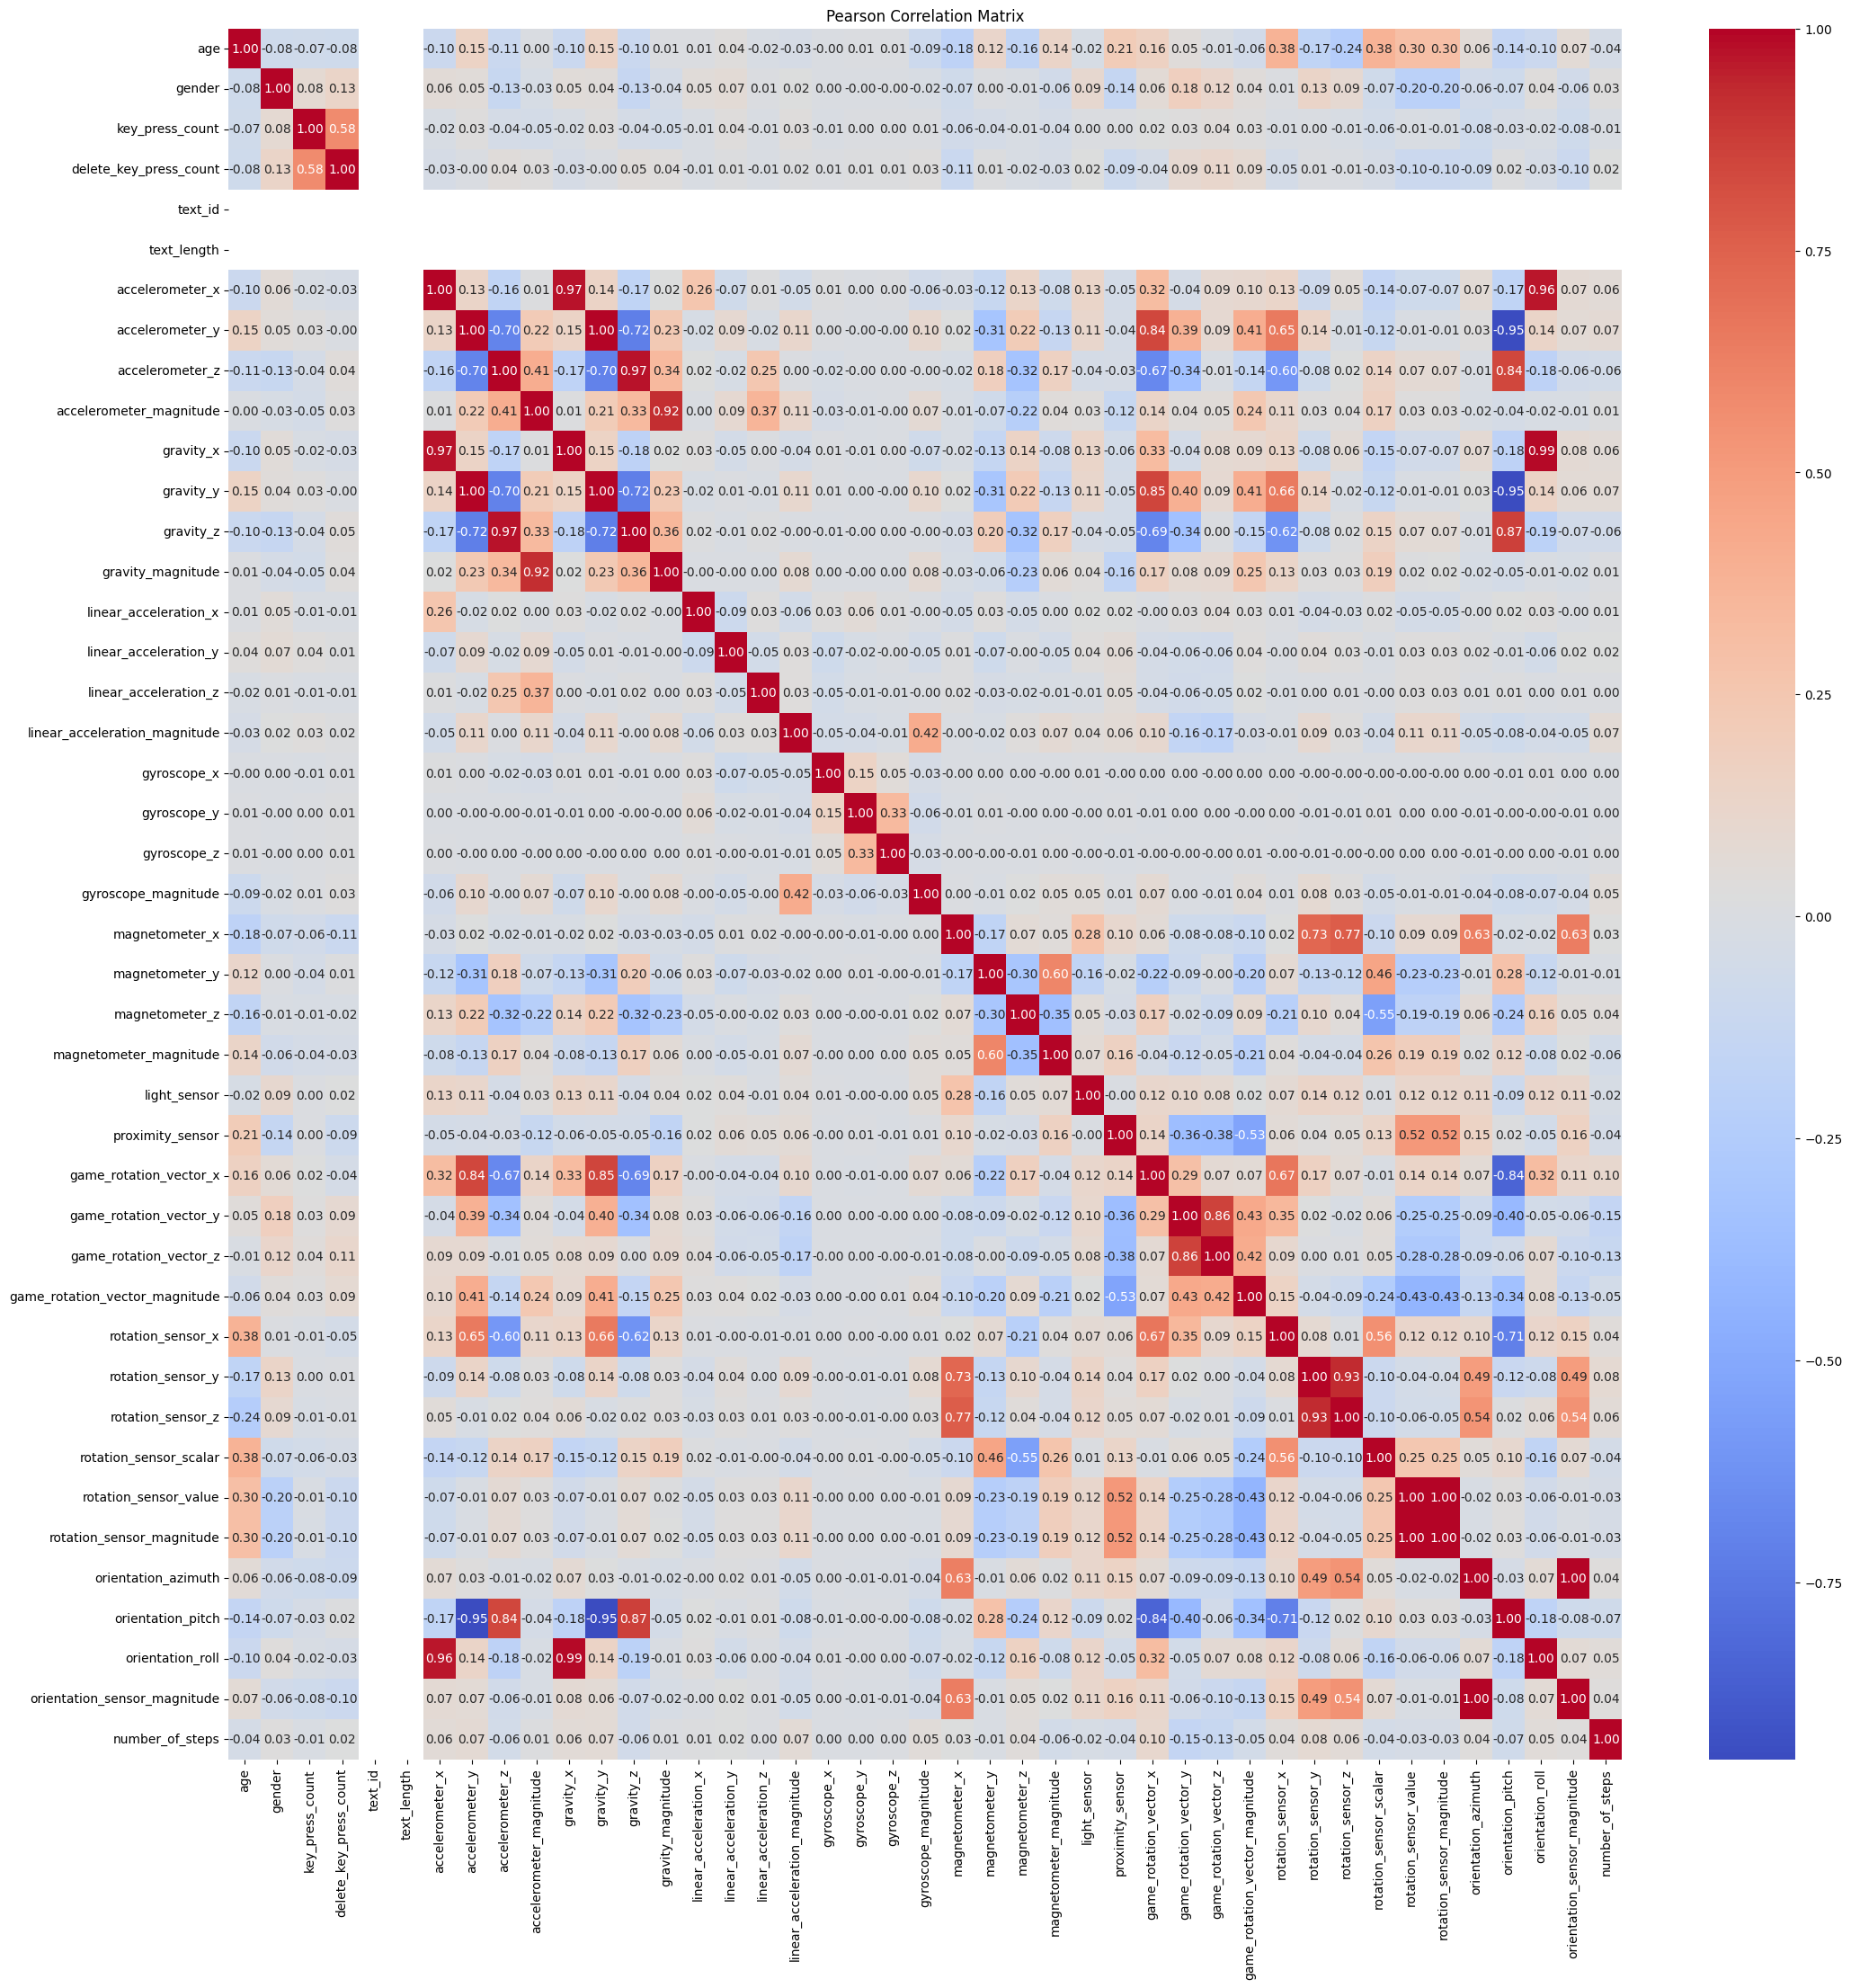

In [ ]:
# pearse correlation matrix
correlation_matrix = combined_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 25))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Pearson Correlation Matrix')

# Show plot
plt.show()

# EDA

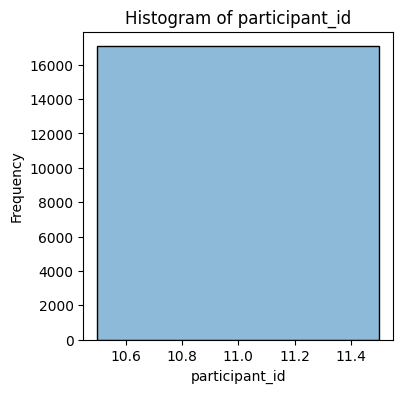

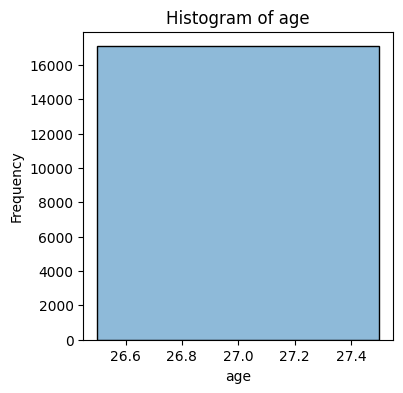

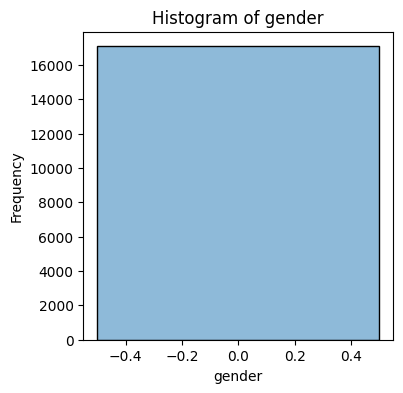

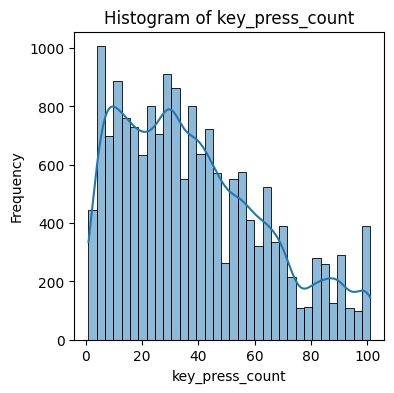

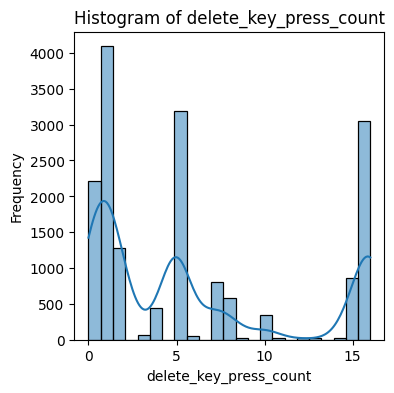

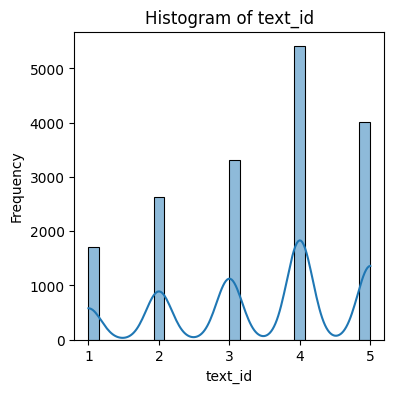

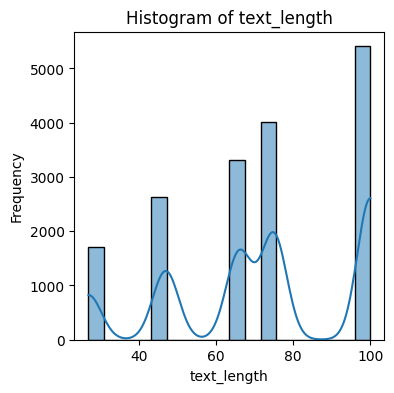

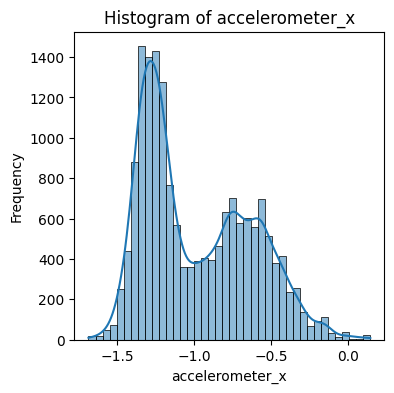

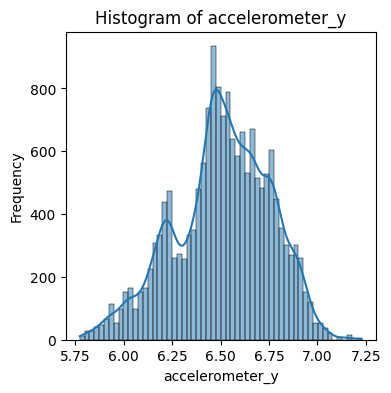

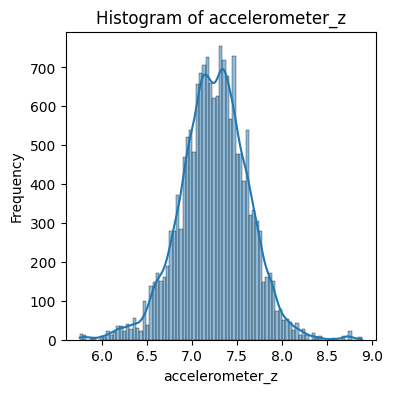

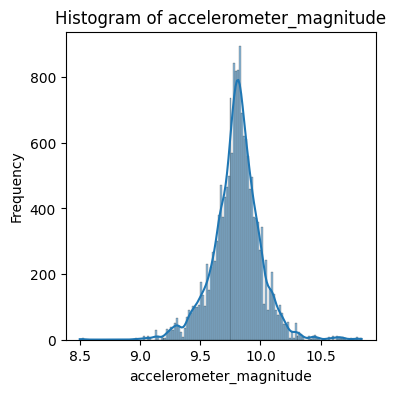

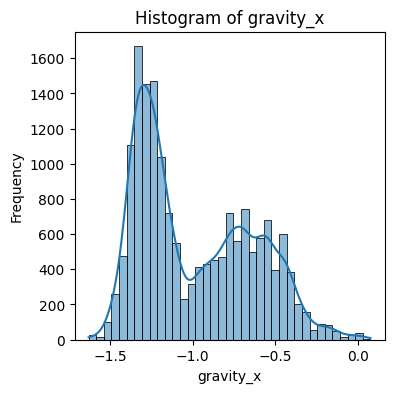

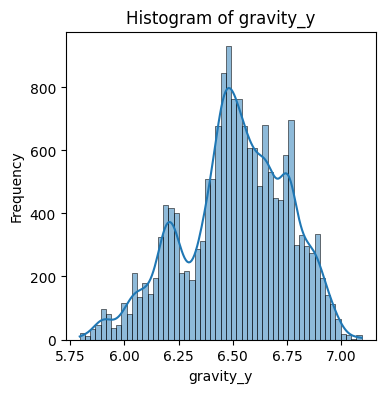

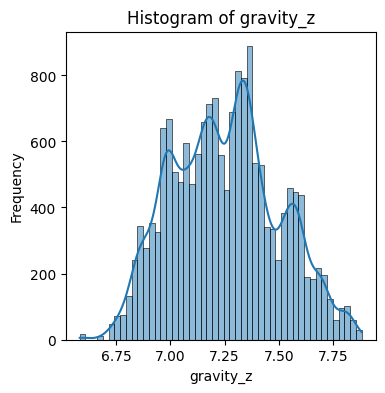

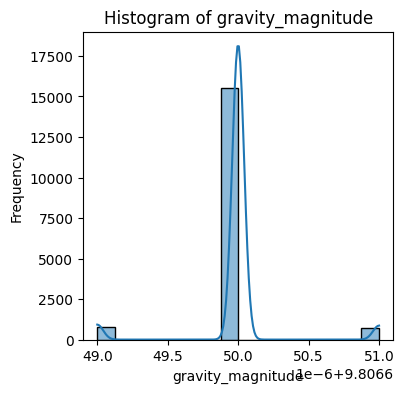

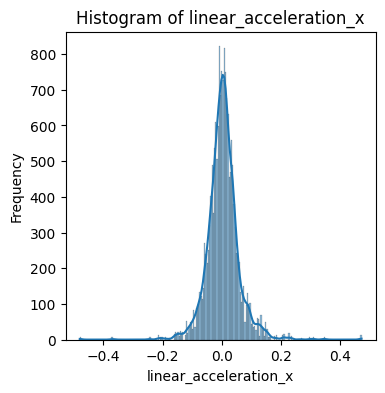

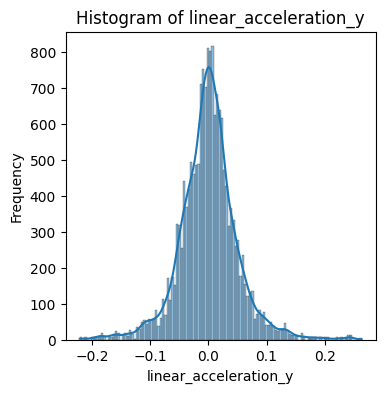

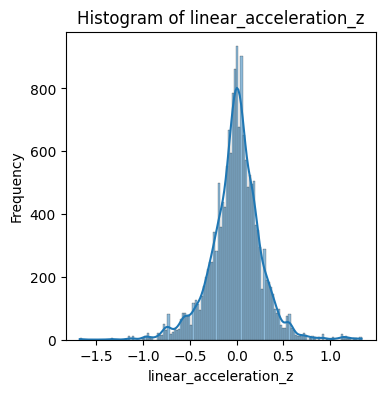

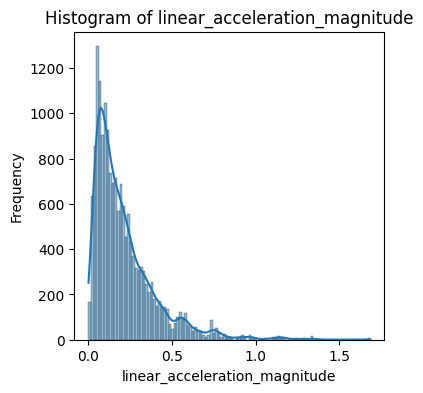

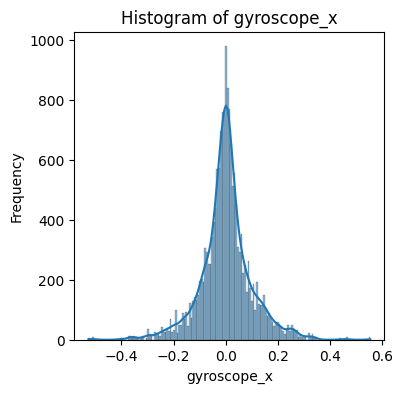

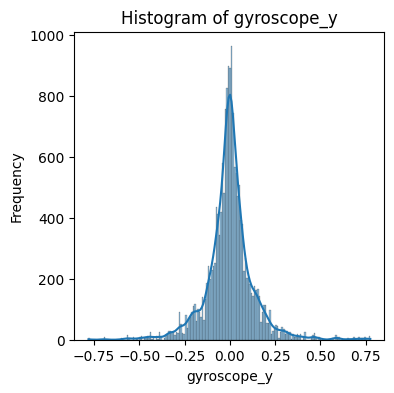

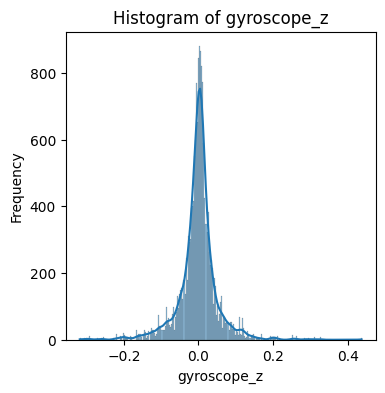

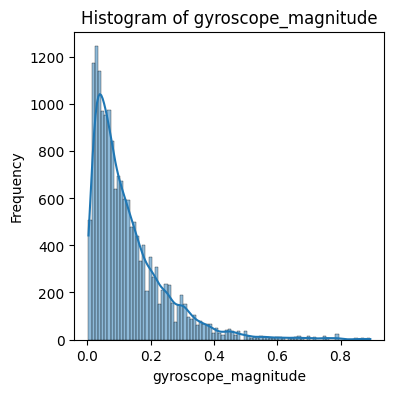

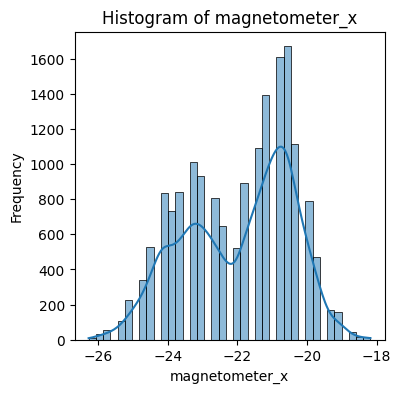

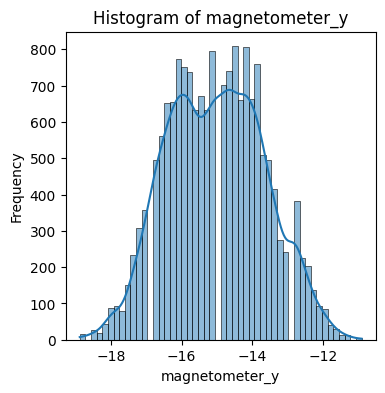

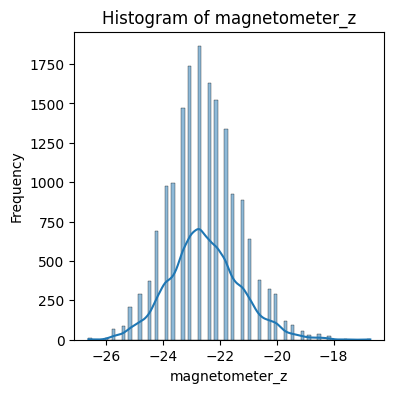

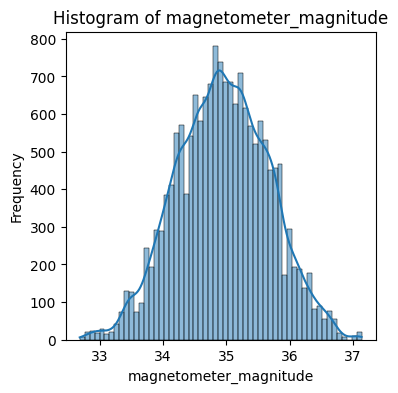

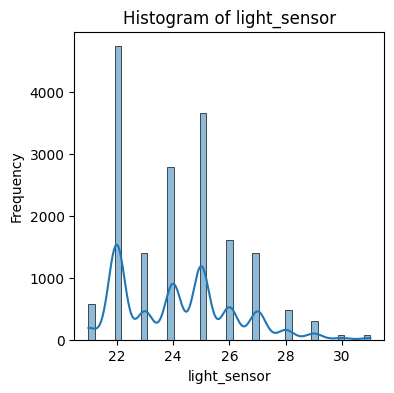

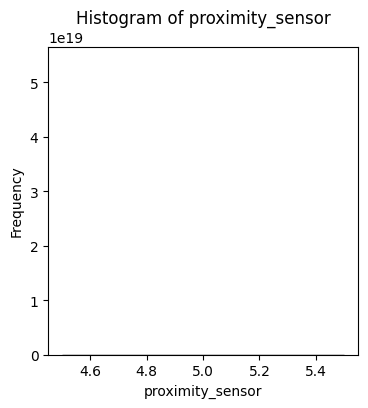

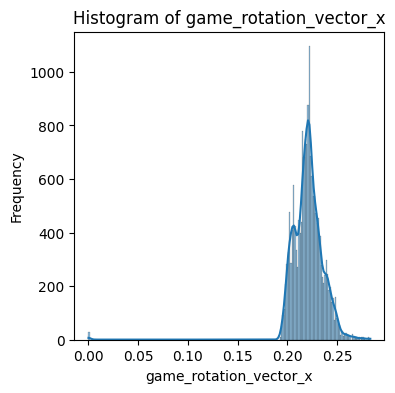

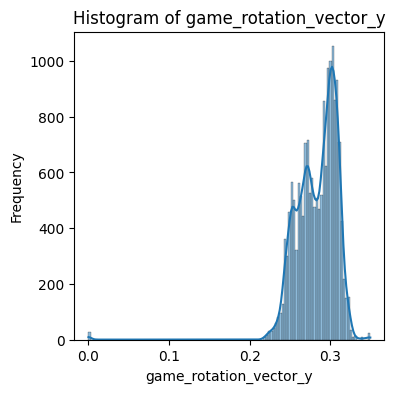

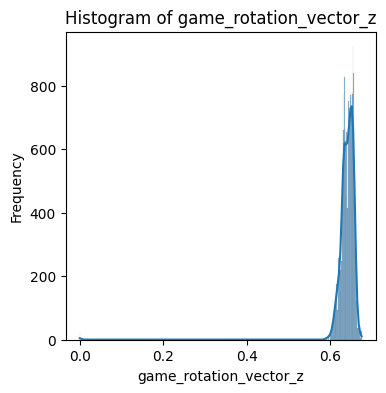

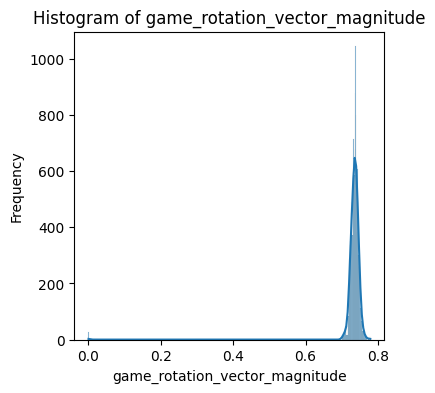

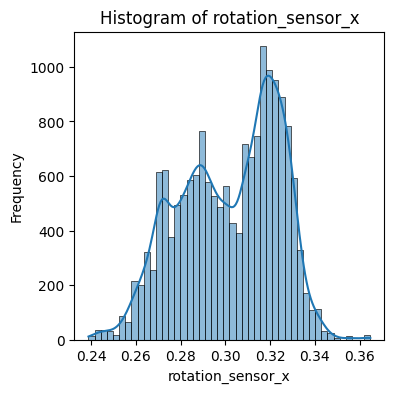

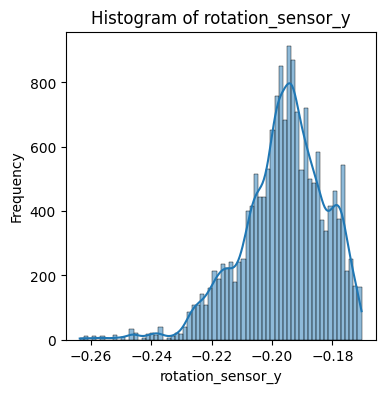

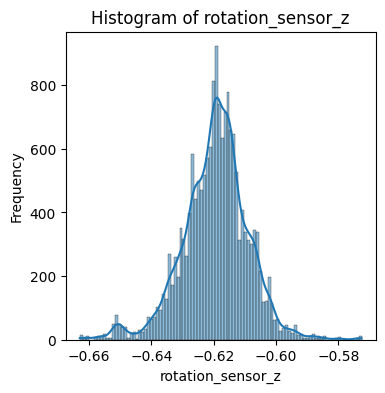

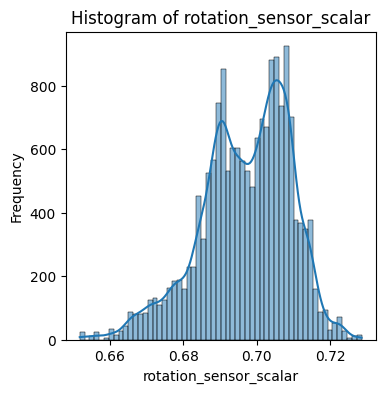

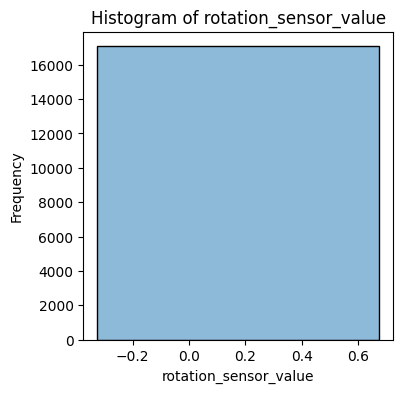

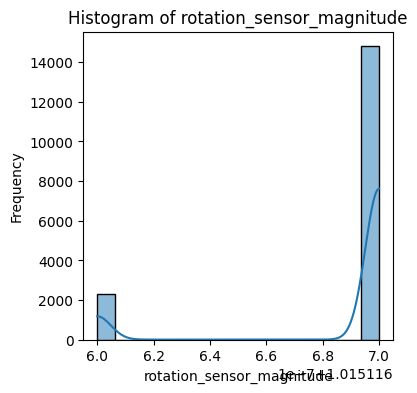

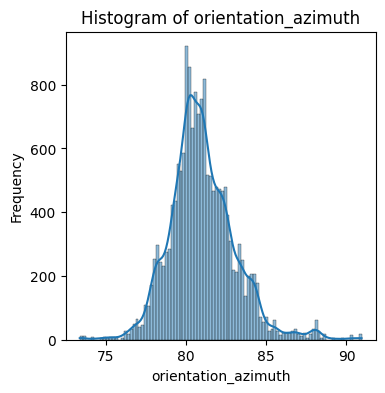

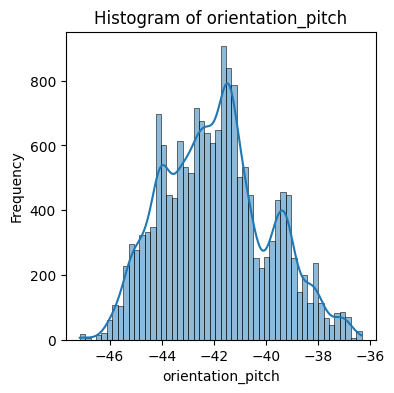

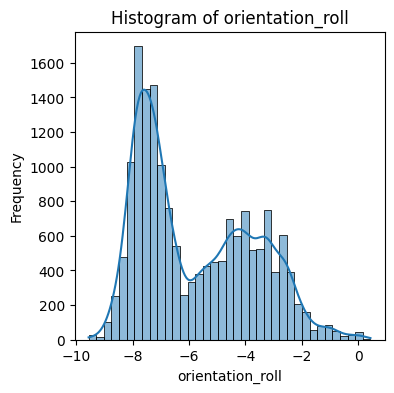

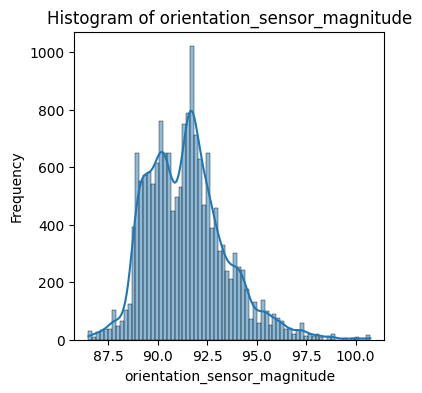

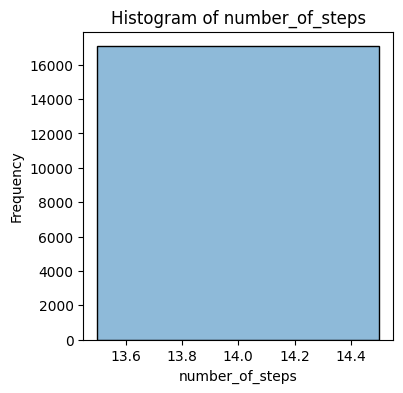

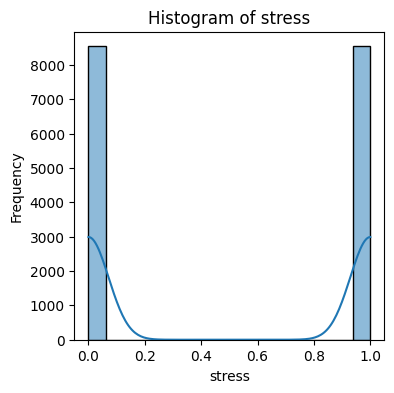

In [ ]:
numerical_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
for col in combined_df.columns:
    plt.figure(figsize=(4, 4))
    sns.histplot(combined_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

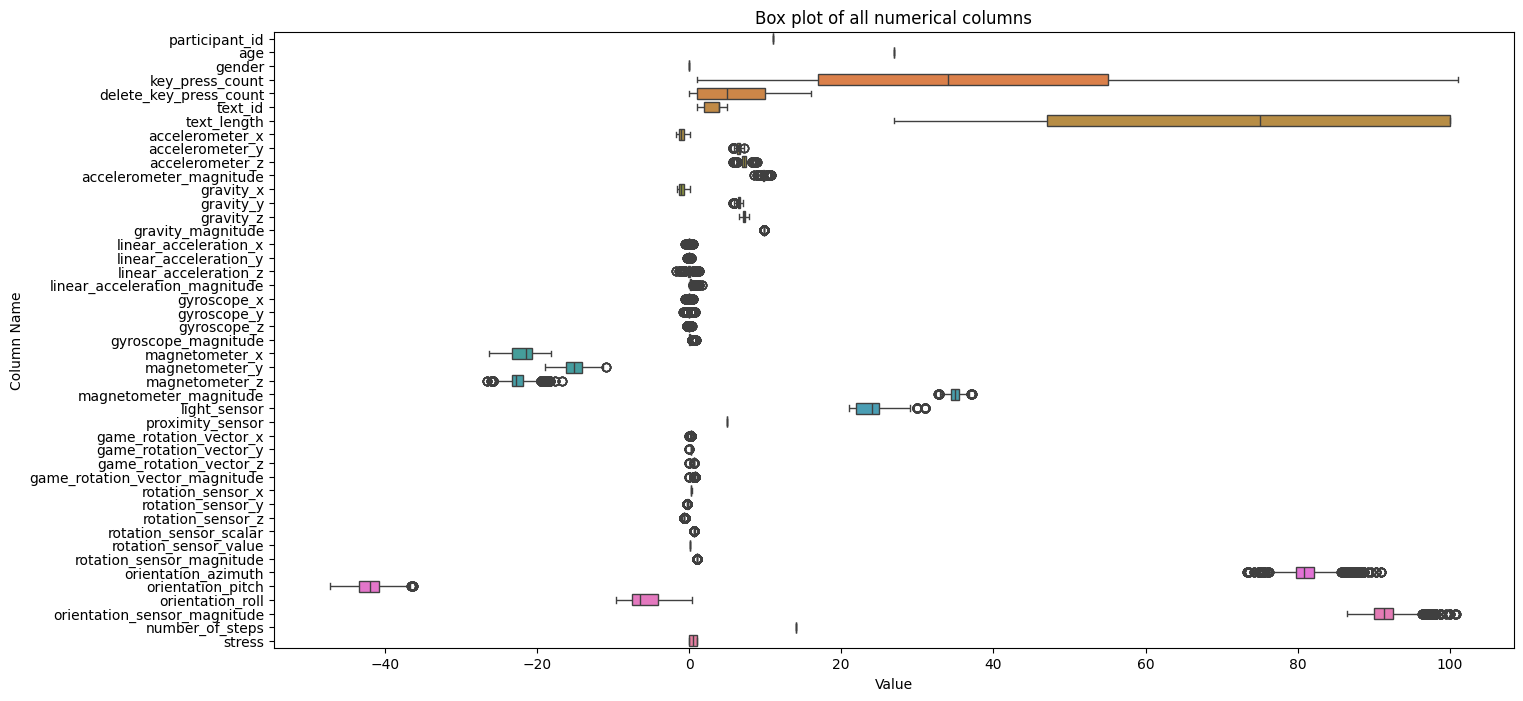

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=combined_df, orient='h')
plt.title('Box plot of all numerical columns')
plt.xlabel('Value')
plt.ylabel('Column Name')
plt.show()

In [ ]:

print(len(combined_df.columns))
print(len(combined_df.select_dtypes(include=['float64', 'int64']).columns))

45
45


In [ ]:
# outliers removal

def remove_outliers_iqr_separate(df, whisker_width=1.5):
    df_cleaned = df.copy()  # Create a copy of the original DataFrame

    for column in df.columns:
        # Calculate the first quartile (Q1) and third quartile (Q3) for the current column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range) for the current column
        IQR = Q3 - Q1

        # Define the lower and upper bounds for the current column
        lower_bound = Q1 - whisker_width * IQR
        upper_bound = Q3 + whisker_width * IQR

        # Remove rows where the current column falls outside the bounds
        df_cleaned = df_cleaned[~((df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound))]

    return df_cleaned

# Remove outliers from each column of the DataFrame 'combined_df' separately
combined_df_cleaned = remove_outliers_iqr_separate(combined_df.drop(columns=['stress']))

# Add back the 'stress' column to the cleaned DataFrame if needed
if 'stress' in combined_df.columns:
    combined_df_cleaned['stress'] = combined_df['stress']


In [ ]:
print(combined_df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9296 entries, 2 to 17073
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   participant_id                  9296 non-null   int64  
 1   age                             9296 non-null   int64  
 2   gender                          9296 non-null   int64  
 3   key_press_count                 9296 non-null   int64  
 4   delete_key_press_count          9296 non-null   int64  
 5   text_id                         9296 non-null   int64  
 6   text_length                     9296 non-null   int64  
 7   accelerometer_x                 9296 non-null   float64
 8   accelerometer_y                 9296 non-null   float64
 9   accelerometer_z                 9296 non-null   float64
 10  accelerometer_magnitude         9296 non-null   float64
 11  gravity_x                       9296 non-null   float64
 12  gravity_y                       9296 n

In [ ]:
# minmax scaling
scaler = MinMaxScaler()
# Scale the numerical columns
selected_cols = combined_df.columns[combined_df.columns != "stress"]
combined_df_scaled = combined_df_cleaned.copy()  # Make a copy of the original DataFrame to preserve it
combined_df_scaled[selected_cols] = scaler.fit_transform(combined_df_cleaned[selected_cols])

In [ ]:
# standard scaling
#std_scaler = Stan


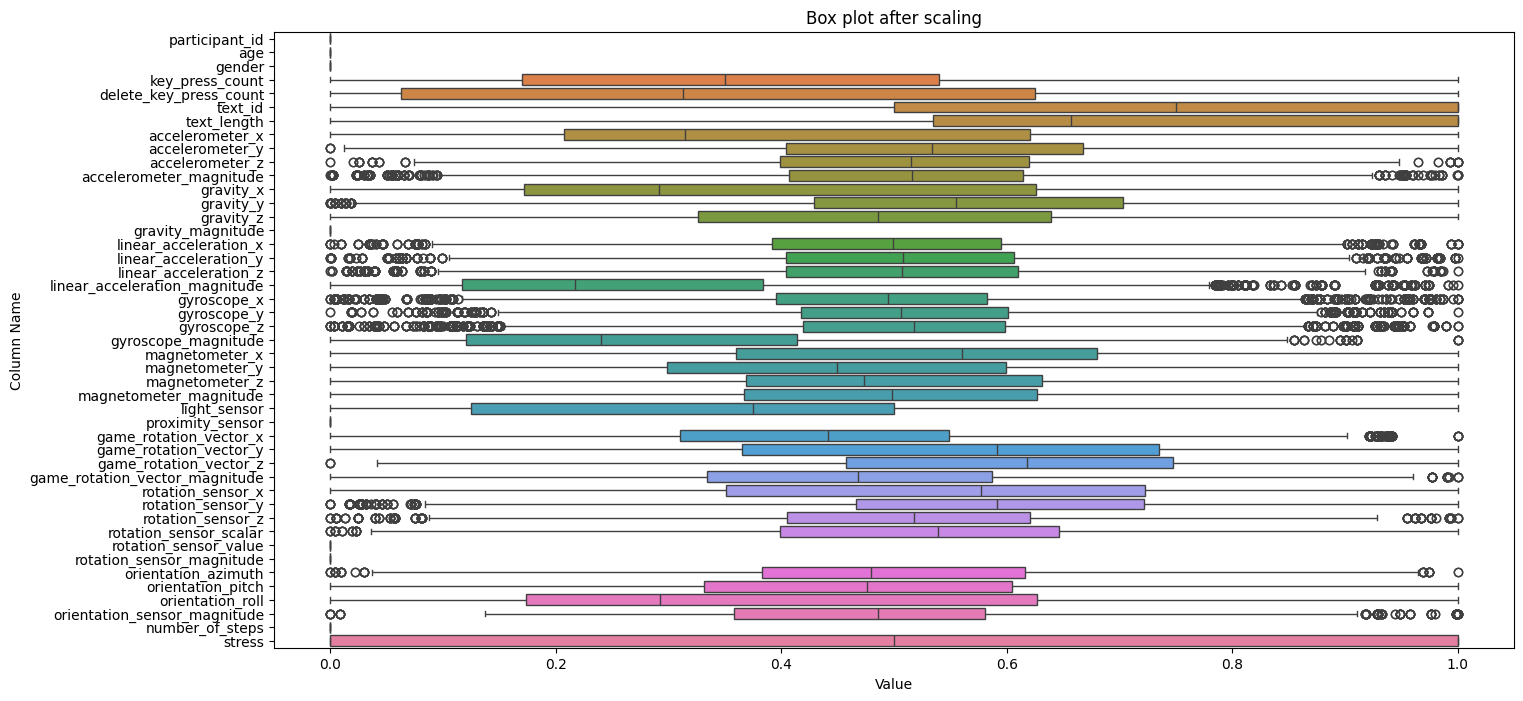

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=combined_df_scaled, orient='h')
plt.title('Box plot after scaling')
plt.xlabel('Value')
plt.ylabel('Column Name')
plt.show()

# ML model

In [ ]:
# spliting target class
#X = combined_df_scaled.drop(['stress'], axis=1)  # Features
#y = combined_df_scaled['stress']  # Target variable

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)



In [ ]:
split_shape = {"TRAINING": [X_train.shape,y_train.shape],
#               "VALIDATING": [X_val.shape, y_val.shape],
               "TESTING": [X_test.shape, y_test.shape]}

split_shape_df = pd.DataFrame(split_shape, index=["X shape", "y shape"])
display(split_shape_df)


,TRAINING,TESTING
X shape,"(1384, 1000)","(346, 1000)"
y shape,"(1384,)","(346,)"


In [ ]:
# Random Forest

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = (predictions == y_test).mean()
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.10115606936416185
Confusion Matrix:
[[ 14 172]
 [139  21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.08      0.08       186
           1       0.11      0.13      0.12       160

    accuracy                           0.10       346
   macro avg       0.10      0.10      0.10       346
weighted avg       0.10      0.10      0.10       346



In [ ]:
# GNB gaussian

from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Train the classifier on the training data
gnb_classifier.fit(X_train, y_train)

# Predict on the test data
predictions = gnb_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 14 172]
 [ 25 135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.08      0.12       186
           1       0.44      0.84      0.58       160

    accuracy                           0.43       346
   macro avg       0.40      0.46      0.35       346
weighted avg       0.40      0.43      0.33       346



In [ ]:
# logistic regression

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
log_reg_classifier = LogisticRegression()

# Train the classifier on the training data
log_reg_classifier.fit(X_train, y_train)

# Predict on the test data
predictions = log_reg_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 16 170]
 [ 31 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.09      0.14       186
           1       0.43      0.81      0.56       160

    accuracy                           0.42       346
   macro avg       0.39      0.45      0.35       346
weighted avg       0.38      0.42      0.33       346



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# soft voting ensemble learning

from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, classification_report


# Define the base classifiers
gnb_classifier = GaussianNB()
lr_classifier = LogisticRegression(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)

# Create a Soft Voting Classifier
voting_classifier = VotingClassifier(estimators=[('dt', gnb_classifier), ('lr', lr_classifier), ('svm', svm_classifier)], voting='soft')

# Train the classifier on the training data
voting_classifier.fit(X_train, y_train)

# Predict on the test data
predictions = voting_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[ 293 3162]
 [ 296 3173]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.08      0.14      3455
           1       0.50      0.91      0.65      3469

    accuracy                           0.50      6924
   macro avg       0.50      0.50      0.40      6924
weighted avg       0.50      0.50      0.40      6924



In [ ]:
# PCA

# PCA feature space plot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Generate some synthetic classification data (replace this with your own data)
#X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_clusters_per_class=1, random_state=42)

# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=1000)
X_pca = pca.fit_transform(X)

# Create a DataFrame for plotting
#data = np.hstack((X_pca, y[:]))

#df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
#df["Class"] = y

# Plot the feature space
#sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df, palette='bright', alpha=0.7)
#plt.title('Feature Space after PCA')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.show()



#pca = PCA(n_components=0.8)  # Choose the number of components to explain 95% of the variance
#X_train_pca = pca.fit_transform(X_train)
#X_val_pca = pca.transform(X_val)
#X_test_pca = pca.transform(X_test)

In [ ]:
# Standardize features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_pca)
#X_val_scaled = scaler.transform(X_val_pca)
#X_test_scaled = scaler.transform(X_test_pca)

In [ ]:
print(y_test.value_counts())
print(combined_df["stress"].value_counts())

stress
0    186
1    160
Name: count, dtype: int64
stress
0    865
1    865
Name: count, dtype: int64


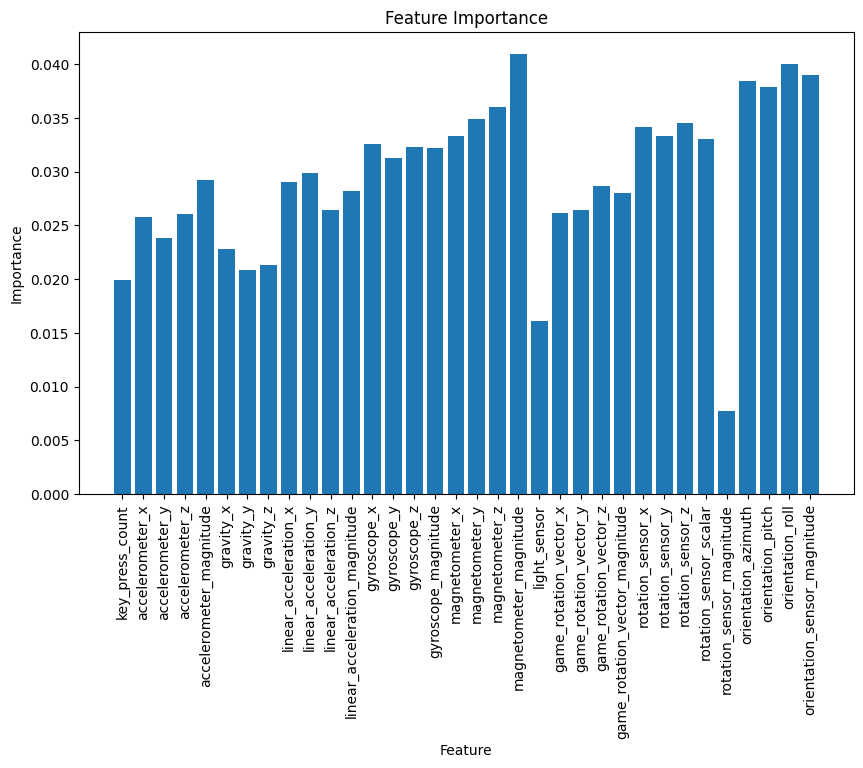

In [ ]:
# feature selection using RF

# Train a RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Plot feature importances
#plt.figure(figsize=(10, 6))
#plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
#plt.xticks(range(len(clf.feature_importances_)), X_train.columns, rotation=90)
#plt.xlabel('Feature')
#plt.ylabel('Importance')
#plt.title('Feature Importance')
#plt.show()

In [ ]:
selector = SelectKBest(score_func=chi2, k=30)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_indices]

# Print the selected features
print("Selected Features:", selected_features)


Selected Features: Index(['participant_id', 'age', 'key_press_count', 'delete_key_press_count',
       'accelerometer_x', 'accelerometer_z', 'accelerometer_magnitude',
       'gravity_x', 'linear_acceleration_x', 'linear_acceleration_z',
       'linear_acceleration_magnitude', 'gyroscope_x', 'gyroscope_y',
       'gyroscope_z', 'gyroscope_magnitude', 'magnetometer_x',
       'magnetometer_y', 'magnetometer_z', 'magnetometer_magnitude',
       'light_sensor', 'game_rotation_vector_x', 'game_rotation_vector_y',
       'game_rotation_vector_z', 'game_rotation_vector_magnitude',
       'rotation_sensor_x', 'rotation_sensor_scalar', 'rotation_sensor_value',
       'rotation_sensor_magnitude', 'orientation_roll', 'number_of_steps'],
      dtype='object')


In [ ]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_val = X_val[selected_features]

## FNN

In [ ]:
from keras.utils import to_categorical

# One-hot encode the target labels
#y_train_categorical = to_categorical(y_train)
#y_test_categorical = to_categorical(y_test)
#y_val_categorical = to_categorical(y_val)

model = Sequential()
model.add(Dense(units=256, activation='tanh', input_dim=X_train.shape[1]))
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=32, activation='tanh'))
model.add(Dense(units=16, activation='tanh'))
model.add(Dense(units=8, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model with different batch sizes
batch_sizes = [32, 64, 128]  # Example batch sizes to try
histories = []

for batch_size in batch_sizes:
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=200, validation_data=(X_val, y_val))
    histories.append(history)

# Plot training and validation accuracy for each batch size
plt.figure(figsize=(10, 5))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Train Batch Size {batch_sizes[i]}')
    plt.plot(history.history['val_accuracy'], label=f'Validation Batch Size {batch_sizes[i]}')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
44/44 [==============================] - 0s 7ms/step - loss: 0.6882 - accuracy: 0.5043 - val_loss: 0.7641 - val_accuracy: 0.4249
Epoch 2/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.5188 - val_loss: 0.7673 - val_accuracy: 0.4249
Epoch 3/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6877 - accuracy: 0.5137 - val_loss: 0.7660 - val_accuracy: 0.5376
Epoch 4/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.5007 - val_loss: 0.7747 - val_accuracy: 0.4249
Epoch 5/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.5231 - val_loss: 0.7837 - val_accuracy: 0.4249
Epoch 6/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6879 - accuracy: 0.5145 - val_loss: 0.7891 - val_accuracy: 0.4249
Epoch 7/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.5188 - val_loss: 0.7796 - val_accuracy: 0.4249
Epoch 8/200
4

11/11 [==============================] - 0s 2ms/step - loss: 0.8247 - accuracy: 0.4220
Test Loss: 0.8246911764144897, Test Accuracy: 0.4219653308391571


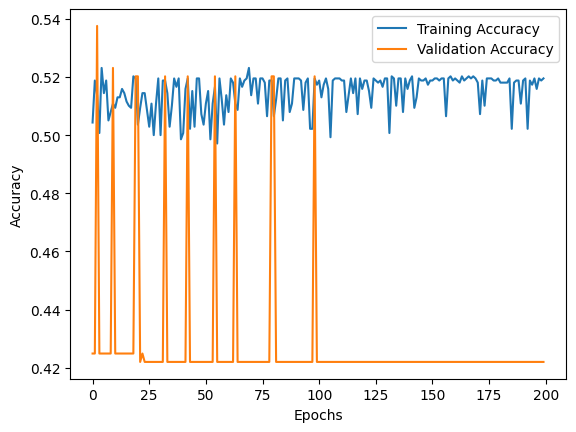

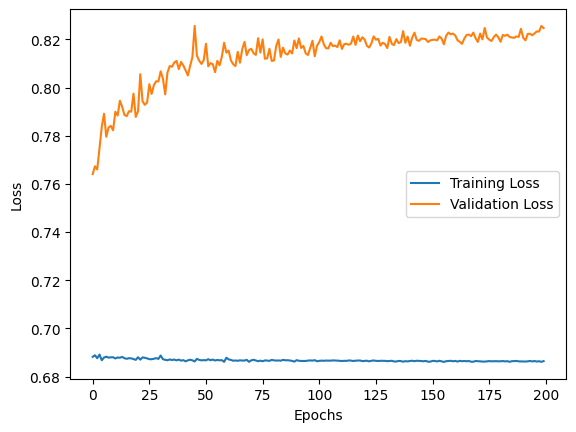

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

194/194 [==============================] - 0s 1ms/step

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3101
           1       0.50      1.00      0.67      3101

    accuracy                           0.50      6202
   macro avg       0.25      0.50      0.33      6202
weighted avg       0.25      0.50      0.33      6202



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


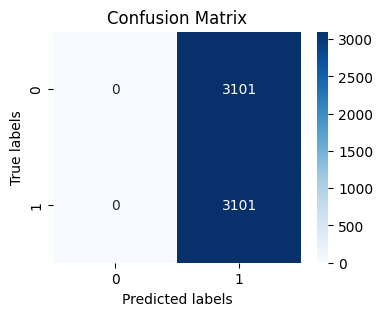

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred_classes = (y_pred_prob > 0.5).astype(int)

print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_classes))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels, title, and axis ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(cm))+0.5, labels=np.arange(len(cm)))
plt.yticks(ticks=np.arange(len(cm))+0.5, labels=np.arange(len(cm)))
plt.show()

In [ ]:
# investigating misclassification
# Step 1: Get Model Predictions
predictions = model.predict(X_test)

# Step 2: Compare Predictions with Ground Truth
predicted_labels = (predictions > 0.5).astype(int).flatten()  # Convert probabilities to binary labels and flatten to 1D array
correct_labels = y_test.values.flatten()  # Convert Pandas Series to NumPy array and flatten to 1D array

# Step 3: Extract Misclassified Instances
misclassified_indices = np.where(predicted_labels != correct_labels)[0]
misclassified_instances = X_test.iloc[misclassified_indices]  # Assuming X_test is a DataFrame

# Step 4: Analyze Misclassified Instances
print("Number of misclassified instances:", len(misclassified_instances))
print("Misclassified instances:")
display(misclassified_instances)

# Step 5: Identify Potential Issues
# Perform further analysis to identify patterns or common characteristics in misclassified instances

# Step 6: Refine Preprocessing or Feature Engineering
# Based on your analysis, make adjustments to preprocessing or feature engineering steps

# Step 7: Iterate and Experiment
# Make adjustments to your preprocessing pipeline or feature engineering based on your analysis
# Re-train your model with the refined dataset and evaluate its performance

194/194 [==============================] - 0s 1ms/step
Number of misclassified instances: 3161
Misclassified instances:


,key_press_count,accelerometer_x,accelerometer_y,accelerometer_z,accelerometer_magnitude,gravity_x,gravity_y,gravity_z,linear_acceleration_x,linear_acceleration_y,...,game_rotation_vector_magnitude,rotation_sensor_x,rotation_sensor_y,rotation_sensor_z,rotation_sensor_scalar,rotation_sensor_magnitude,orientation_azimuth,orientation_pitch,orientation_roll,orientation_sensor_magnitude
11450,0.288136,0.577324,0.740807,0.382716,0.485241,0.598618,0.769272,0.366002,0.451206,0.354326,...,0.553480,0.442786,0.952016,0.961433,0.318962,0.002504,0.591115,0.294974,0.594790,0.575665
7372,0.813559,0.668380,0.127847,0.870101,0.616328,0.701393,0.146880,0.911668,0.412361,0.307361,...,0.280491,0.434544,0.698293,0.948845,0.527414,0.002507,0.658679,0.877168,0.699465,0.634936
52065,0.593220,0.467766,0.805167,0.325563,0.521844,0.491459,0.818967,0.304163,0.388981,0.527017,...,0.616247,0.883129,0.516665,0.538172,0.968463,0.002507,0.988504,0.240943,0.490512,0.988628
63060,0.440678,0.771486,0.592182,0.471977,0.363573,0.818231,0.625844,0.507875,0.365324,0.262746,...,0.596147,0.305255,0.935991,0.996329,0.009582,0.002504,0.485765,0.434245,0.816406,0.464351
3953,0.593220,0.518386,0.332233,0.754314,0.569722,0.503051,0.341955,0.795969,0.668172,0.456501,...,0.046322,0.494624,0.736971,0.883902,0.685142,0.999993,0.723738,0.714366,0.502029,0.704978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68934,0.372881,0.640300,0.585304,0.533818,0.489790,0.663813,0.598232,0.559736,0.463214,0.483265,...,0.431159,0.314600,0.915555,0.995884,0.119340,0.002507,0.519161,0.471689,0.661977,0.497314
6504,0.355932,0.631321,0.141405,0.849480,0.549421,0.643685,0.131813,0.925556,0.533051,0.617381,...,0.332263,0.420016,0.701363,0.949712,0.526369,0.002507,0.657409,0.885066,0.658351,0.633445
12502,0.813559,0.418555,0.520908,0.678130,0.767022,0.430998,0.550368,0.618927,0.442450,0.290558,...,0.400395,0.353065,0.884444,0.974230,0.336835,0.002507,0.589164,0.523110,0.430448,0.568267
42797,0.101695,0.240017,0.866875,0.170103,0.353763,0.220379,0.901274,0.164412,0.578737,0.321187,...,0.529099,0.554706,0.921501,0.900775,0.551624,0.003873,0.679535,0.260670,0.403889,0.667534


<ipython-input-115-b910bf47ab96>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='key_press_count', y='accelerometer_x', data=misclassified_instances, palette='Set1', legend='full')


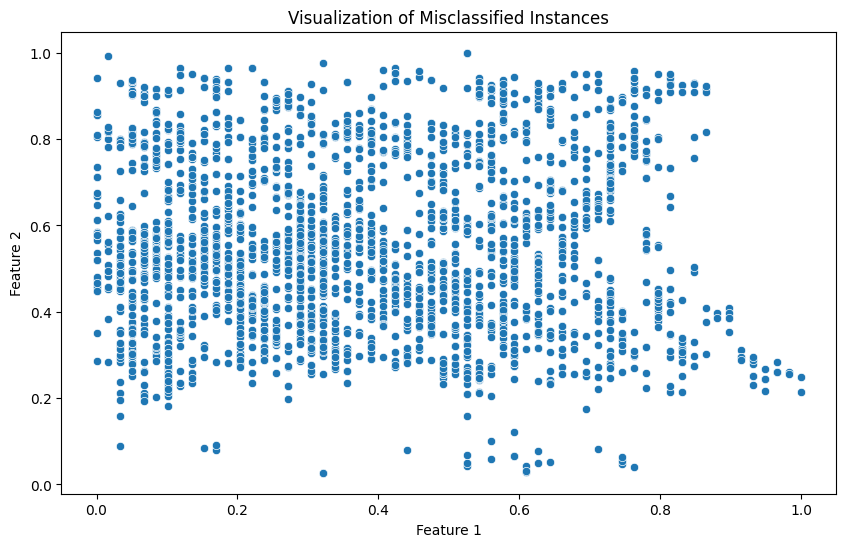

In [ ]:
# Step 5: Identify Potential Issues
# Visualize misclassified instances
plt.figure(figsize=(10, 6))
sns.scatterplot(x='key_press_count', y='accelerometer_x', data=misclassified_instances, palette='Set1', legend='full')
plt.title('Visualization of Misclassified Instances')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## LGBM

In [ ]:
lgbm = LGBMClassifier(n_estimators=500, random_state=42)

lgbm.fit(X_train_scaled, y_train)


[LightGBM] [Info] Number of positive: 62312, number of negative: 62312
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 124624, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(n_estimators=500, random_state=42)

In [ ]:
# Make predictions
y_test_pred = lgbm.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.4711132936622566
